In [1]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

# read in data
SAMI_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_sami_1.0.fits')
HSC_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
HSC_G12_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g12randisprimcorrect.fits')


In [8]:
# set misssing RE_CIRC values to mean of G12, then make 5RE_CIRC_MPC col
maskedID = SAMI_G12_gals['RE_CIRC_KPC'].mask.nonzero()[0]
print(maskedID)
check = []

for i in maskedID:
    SAMI_G12_gals['RE_CIRC_KPC'][i] = np.mean(SAMI_G12_gals['RE_CIRC_KPC'])
    
print(SAMI_G12_gals['RE_CIRC_KPC'].mask.nonzero()[0])

for i in range(len(SAMI_G12_gals)):
    if SAMI_G12_gals['RE_CIRC_KPC'][i] == np.mean(SAMI_G12_gals["RE_CIRC_KPC"][i]):
        check.append(i)

SAMI_G12_gals['5_RE_CIRC_MPC'] = SAMI_G12_gals['RE_CIRC_KPC']*(5/1000)
SAMI_G12_gals.info()
SAMI_G12_gals.write('/suphys/fscu5535/HSC_work/mod_data/G12_sami_1.0.fits',overwrite=True)

[]
[]
<Table length=732>
     name      dtype     unit      class     n_bad
------------- ------- --------- ------------ -----
        CATID   int64           MaskedColumn     0
           RA float32       deg       Column     0
          DEC float32       deg       Column     0
       Z_SPEC float32                 Column     0
  RE_CIRC_KPC float64           MaskedColumn     0
        ELLIP float64           MaskedColumn    30
   LAMBDAR_RE float64           MaskedColumn   404
       RA_RAD float32       rad       Column     0
      DEC_RAD float32       rad       Column     0
ANG_DIAM_DIST float64 Mpc / rad       Column     0
5_RE_CIRC_MPC float64           MaskedColumn     0


In [2]:
# now repeat for various z 
redshifts = [0.125]

for k in redshifts:
    
    print("starting z <",k)
    
    CATIDS = np.zeros(len(SAMI_G12_gals),dtype=int)
    RE_CIRC_KPC = np.zeros(len(SAMI_G12_gals))
    #object_ids = np.full((len(SAMI_G12_gals),60000),np.nan)
    distances = np.full((len(SAMI_G12_gals),51000),np.nan)
    #HSC_ra = np.full((len(SAMI_G12_gals),60000),np.nan)
    #HSC_dec = np.full((len(SAMI_G12_gals),60000),np.nan)
    #HSC_photoz = np.full((len(SAMI_G12_gals),60000),np.nan)
    HSC_count = 0

    for i in range(len(SAMI_G12_gals)):
        ang_diam_1rad = SAMI_G12_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G12_gals['CATID'][i]
        RE_CIRC_KPC[i] = SAMI_G12_gals['RE_CIRC_KPC'][i]
        col = 0

        for j in range(len(HSC_G12_gals)):
            
#            if HSC_G12_gals['photoz_median'][j] <= k:
            HSC_count += 1
            ang_sep = angular_separation(SAMI_G12_gals['RA_RAD'][i],SAMI_G12_gals['DEC_RAD'][i],
                                HSC_G12_gals['ra_rad'][j],HSC_G12_gals['dec_rad'][j])
            sep = ang_sep*ang_diam_1rad

            if SAMI_G12_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                #object_ids[i][col] = HSC_G12_gals['object_id'][j]
                #HSC_ra[i][col] = HSC_G12_gals['ra'][j]
                #HSC_dec[i][col] = HSC_G12_gals['dec'][j]
                #HSC_photoz[i][col] = HSC_G12_gals['photoz_median'][j]
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G12_gals),"done")

    HSC_count = int(HSC_count/len(SAMI_G12_gals))
    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RE_CIRC_KPC'] = RE_CIRC_KPC
    #chunk['OBJECT_ID'] = object_ids
    chunk['DISTANCE'] = distances
    distances = 0
    #chunk['HSC_RA'] = HSC_ra
    #chunk['HSC_DEC'] = HSC_dec
    #chunk['HSC_PHOTOZ'] = HSC_photoz
    print("HSC_count:",HSC_count)

    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}_20Mpc_5REmin.fits'.format(k),overwrite=True)


starting z < 0.125
1 / 732 done
2 / 732 done
3 / 732 done
4 / 732 done
5 / 732 done
6 / 732 done
7 / 732 done
8 / 732 done
9 / 732 done
10 / 732 done
11 / 732 done
12 / 732 done
13 / 732 done
14 / 732 done
15 / 732 done
16 / 732 done
17 / 732 done
18 / 732 done
19 / 732 done
20 / 732 done
21 / 732 done
22 / 732 done
23 / 732 done
24 / 732 done
25 / 732 done
26 / 732 done
27 / 732 done
28 / 732 done
29 / 732 done
30 / 732 done
31 / 732 done
32 / 732 done
33 / 732 done
34 / 732 done
35 / 732 done
36 / 732 done
37 / 732 done
38 / 732 done
39 / 732 done
40 / 732 done
41 / 732 done
42 / 732 done
43 / 732 done
44 / 732 done
45 / 732 done
46 / 732 done
47 / 732 done
48 / 732 done
49 / 732 done
50 / 732 done
51 / 732 done
52 / 732 done
53 / 732 done
54 / 732 done
55 / 732 done
56 / 732 done
57 / 732 done
58 / 732 done
59 / 732 done
60 / 732 done
61 / 732 done
62 / 732 done
63 / 732 done
64 / 732 done
65 / 732 done
66 / 732 done
67 / 732 done
68 / 732 done
69 / 732 done
70 / 732 done
71 / 732 d

554 / 732 done
555 / 732 done
556 / 732 done
557 / 732 done
558 / 732 done
559 / 732 done
560 / 732 done
561 / 732 done
562 / 732 done
563 / 732 done
564 / 732 done
565 / 732 done
566 / 732 done
567 / 732 done
568 / 732 done
569 / 732 done
570 / 732 done
571 / 732 done
572 / 732 done
573 / 732 done
574 / 732 done
575 / 732 done
576 / 732 done
577 / 732 done
578 / 732 done
579 / 732 done
580 / 732 done
581 / 732 done
582 / 732 done
583 / 732 done
584 / 732 done
585 / 732 done
586 / 732 done
587 / 732 done
588 / 732 done
589 / 732 done
590 / 732 done
591 / 732 done
592 / 732 done
593 / 732 done
594 / 732 done
595 / 732 done
596 / 732 done
597 / 732 done
598 / 732 done
599 / 732 done
600 / 732 done
601 / 732 done
602 / 732 done
603 / 732 done
604 / 732 done
605 / 732 done
606 / 732 done
607 / 732 done
608 / 732 done
609 / 732 done
610 / 732 done
611 / 732 done
612 / 732 done
613 / 732 done
614 / 732 done
615 / 732 done
616 / 732 done
617 / 732 done
618 / 732 done
619 / 732 done
620 / 732 

shuffle complete 1252100 randoms selected!


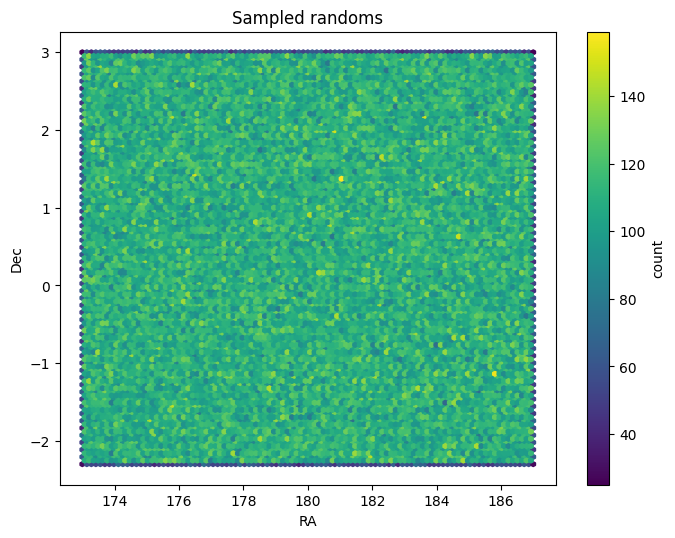

starting z < 0.125
1 / 732 done
2 / 732 done
3 / 732 done
4 / 732 done
5 / 732 done
6 / 732 done
7 / 732 done
8 / 732 done
9 / 732 done
10 / 732 done
11 / 732 done
12 / 732 done
13 / 732 done
14 / 732 done
15 / 732 done
16 / 732 done
17 / 732 done
18 / 732 done
19 / 732 done
20 / 732 done
21 / 732 done
22 / 732 done
23 / 732 done
24 / 732 done
25 / 732 done
26 / 732 done
27 / 732 done
28 / 732 done
29 / 732 done
30 / 732 done
31 / 732 done
32 / 732 done
33 / 732 done
34 / 732 done
35 / 732 done
36 / 732 done
37 / 732 done
38 / 732 done
39 / 732 done
40 / 732 done
41 / 732 done
42 / 732 done
43 / 732 done
44 / 732 done
45 / 732 done
46 / 732 done
47 / 732 done
48 / 732 done
49 / 732 done
50 / 732 done
51 / 732 done
52 / 732 done
53 / 732 done
54 / 732 done
55 / 732 done
56 / 732 done
57 / 732 done
58 / 732 done
59 / 732 done
60 / 732 done
61 / 732 done
62 / 732 done
63 / 732 done
64 / 732 done
65 / 732 done
66 / 732 done
67 / 732 done
68 / 732 done
69 / 732 done
70 / 732 done
71 / 732 d

554 / 732 done
555 / 732 done
556 / 732 done
557 / 732 done
558 / 732 done
559 / 732 done
560 / 732 done
561 / 732 done
562 / 732 done
563 / 732 done
564 / 732 done
565 / 732 done
566 / 732 done
567 / 732 done
568 / 732 done
569 / 732 done
570 / 732 done
571 / 732 done
572 / 732 done
573 / 732 done
574 / 732 done
575 / 732 done
576 / 732 done
577 / 732 done
578 / 732 done
579 / 732 done
580 / 732 done
581 / 732 done
582 / 732 done
583 / 732 done
584 / 732 done
585 / 732 done
586 / 732 done
587 / 732 done
588 / 732 done
589 / 732 done
590 / 732 done
591 / 732 done
592 / 732 done
593 / 732 done
594 / 732 done
595 / 732 done
596 / 732 done
597 / 732 done
598 / 732 done
599 / 732 done
600 / 732 done
601 / 732 done
602 / 732 done
603 / 732 done
604 / 732 done
605 / 732 done
606 / 732 done
607 / 732 done
608 / 732 done
609 / 732 done
610 / 732 done
611 / 732 done
612 / 732 done
613 / 732 done
614 / 732 done
615 / 732 done
616 / 732 done
617 / 732 done
618 / 732 done
619 / 732 done
620 / 732 

In [3]:
# now repeat for randoms, using right number of objects (based on redshift cut)
chunk = 0
# Counts: [0.275, 0.25] = [432462, 346876]

# now repeat for various z 
redshifts = [0.125]
HSC_count = 50084

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25   
    indices = np.random.randint(len(HSC_G12_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")

    plt.figure(figsize=(8,6),dpi=100)
    plt.hexbin(HSC_G12_rands[indices]['ra'],HSC_G12_rands[indices]['dec'])
    plt.xlabel("RA")
    plt.ylabel("Dec")
    plt.title("Sampled randoms")
    cb=plt.colorbar()
    cb.set_label('count')
    plt.show()
    
    print("starting z <",redshifts[k])

    CATIDS = np.zeros(len(SAMI_G12_gals),dtype=int)
    RA = np.zeros(len(SAMI_G12_gals))
    DEC = np.zeros(len(SAMI_G12_gals))
    Z = np.zeros(len(SAMI_G12_gals))
    distances = np.full((len(SAMI_G12_gals),51000*25),np.nan)

    for i in range(len(SAMI_G12_gals)):
        ang_diam_1rad = SAMI_G12_gals['ANG_DIAM_DIST'][i]
        CATIDS[i] = SAMI_G12_gals['CATID'][i]
        RA[i] = SAMI_G12_gals['RA'][i]
        DEC[i] = SAMI_G12_gals['DEC'][i]
        Z[i] = SAMI_G12_gals['Z_SPEC'][i]

        col = 0

        for j in range(random_sample_size):      
            ang_sep = angular_separation(SAMI_G12_gals['RA_RAD'][i],SAMI_G12_gals['DEC_RAD'][i],
                                HSC_G12_rands['ra_rad'][indices[j]],HSC_G12_rands['dec_rad'][indices[j]])
            sep = ang_sep*ang_diam_1rad

            if SAMI_G12_gals['5_RE_CIRC_MPC'][i] < sep < 20:
                distances[i][col] = sep
                col+=1

        print(i+1,"/",len(SAMI_G12_gals),"done")
        
# form data into table, delete massive arrays to save memory
    chunk = QTable()
    chunk['CATID'] = CATIDS
    chunk['RA'] = RA
    chunk['DEC'] = DEC
    chunk['Z'] = Z
    chunk['RAND_DISTANCE'] = distances
    distances = 0

    chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_{}_20Mpc_25xrand_5REmin.fits'.format(redshifts[k]),overwrite=True)
    print("written to file")

In [4]:
chunk = 0

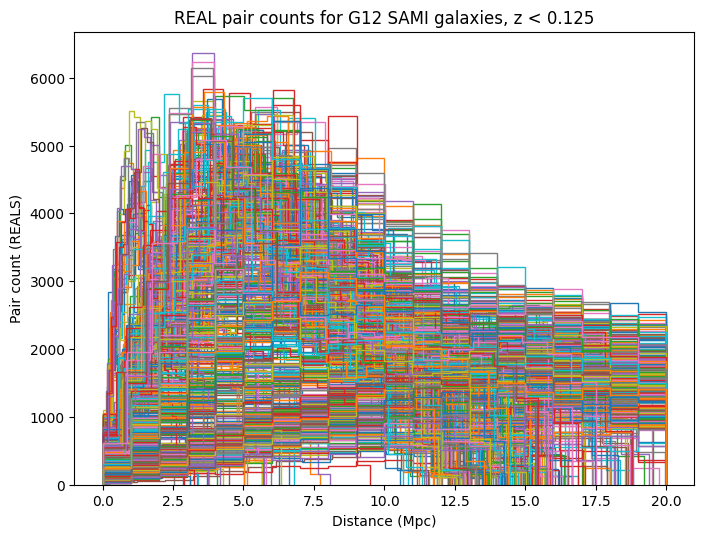

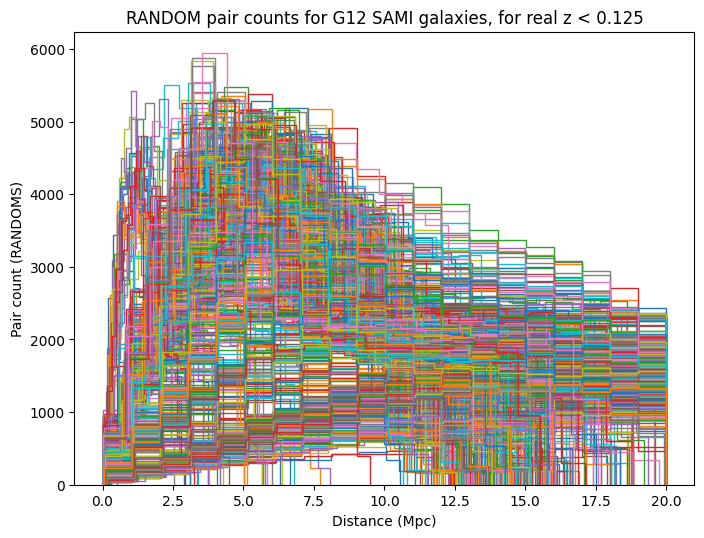

In [50]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']


def paircounthist(redshifts):
    for i in redshifts:

        reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}_20Mpc.fits'.format(i))
        rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_{}.fits'.format(i))

        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(reals)):
            plt.hist(reals['DISTANCE'][j],bins=20,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (REALS)")
        plt.title("REAL pair counts for G12 SAMI galaxies, z < {}".format(i))
        
#         filename = "/suphys/fscu5535/HSC_work/figures/G12realpaircount{}.png".format(i)
#         plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#         plt.clf()


        plt.figure(figsize=(8,6),dpi=100)
        for j in range(len(rands)):
            plt.hist(rands['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
        plt.xlabel("Distance (Mpc)")
        plt.ylabel("Pair count (RANDOMS)")
        plt.title("RANDOM pair counts for G12 SAMI galaxies, for real z < {}".format(i))
        
#         filename = "/suphys/fscu5535/HSC_work/figures/G12randpaircount{}.png".format(i)
#         plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#         plt.clf()
        
    return
 
paircounthist(redshifts)

read in complete (z < 0.125)
50 complete
100 complete
200 complete
500 complete
1000 complete
saved (z < 0.125)


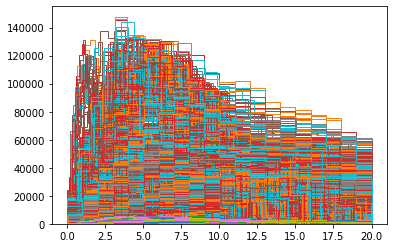

In [4]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

binwidth = [50,100,200,500,1000]
searchradius = 20000
randfactor = 25 
    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}_20Mpc.fits'.format(i))
    rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_{}_20Mpc_25xrand.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    for k in binwidth:

        ratios = np.zeros(searchradius//k)

        # calculate the ratio
        for j in range(len(reals)):
            n_real,bin_real,patches = plt.hist(reals['DISTANCE'][j],bins=searchradius//k,
                                                                  histtype='step',fill=False)

            n_rand,bin_rand,patches = plt.hist(rands['RAND_DISTANCE'][j],bins=searchradius//k,
                                                                  histtype='step',fill=False)

            ratio = (n_real / n_rand)*randfactor
            ratios = np.vstack((ratios,ratio))

        # clean up, remove zeros row and infs
        ratios = np.delete(ratios,0,0)
        xis = ratios-1
#         countinf = 0
#         countminus1 = 0
#         for row in range(xis.shape[0]):
#             for col in range(xis.shape[1]):
#                 if np.isinf(xis[row,col]):
#                     countinf += 1
#                     xis[row,col] = np.nan
#                 if xis[row,col] == -1:
#                     xis[row,col] = np.nan
#                     countminus1 += 1

#         print(k,"countinf: ",countinf)
#         print(k,"countminus1: ",countminus1)            

        reals['xi{}raw'.format(k)] = xis
        
        print(k,"complete")

reals.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}_20Mpc_25xrand.fits'.format(i),overwrite=True)
print("saved (z < {})".format(i))
    
        
#     # plot all xi's 
#     plt.figure(figsize=(8,6),dpi=100)
#     radii = [25,75,125,175,225,275,325,375,425,475,525,575,625,675,725,775,825,875,925,975]
#     for k in range(len(reals)):
#         plt.plot(radii,xis[k])

#     plt.xlabel('Distance (kpc)')
#     plt.ylabel(r'$\xi(r)$')
#     plt.title("Correlation functions for G09 SAMI (HSC z < {})".format(i))
#     plt.show()
        
#     return

# xiplots(redshiftsall)

# def meanxi(redshifts):        
#         # plot mean xi
#         meanratios = np.nanmean(xis,axis=0)
#         plt.figure(figsize=(8,6),dpi=100)
#         #yerr=np.nanstd(xis,axis=0),capsize=3,
#         plt.errorbar(radii,meanratios,label='z < {}'.format(i))
#         plt.xlabel('Distance (kpc)')
#         plt.ylabel(r'$\xi(r)$')
#         plt.title("Mean correlation function for G09 SAMI (HSC z < {})".format(i))
#         plt.legend()
#         plt.show()
#         return

# xiplots(redshifts)

read in complete (z < 0.125)


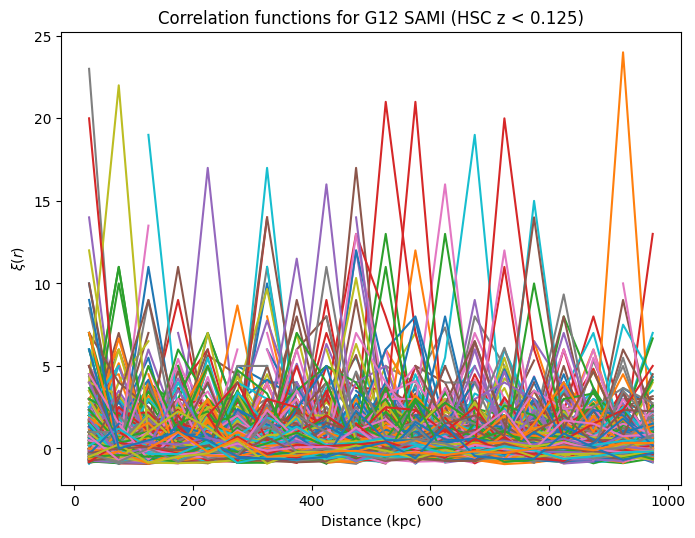

In [25]:
#redshiftsall = ['0.3','0.275','0.25','0.225','0.2','0.175','0.15','0.125','0.1']
redshifts = ['0.125']

radii = []
start = 25
step = 50
end = 975
x = start
while x <= end:
    radii.append(x)
    x += 50
    
    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    
    # plot all xi's 
    plt.figure(figsize=(8,6),dpi=100)
    
    for k in range(len(reals)):
        plt.plot(radii,reals['xi50'][k])

    plt.xlabel('Distance (kpc)')
    plt.ylabel(r'$\xi(r)$')
    plt.title("Correlation functions for G12 SAMI (HSC z < {})".format(i))
    
#     filename = "/suphys/fscu5535/HSC_work/figures/G12_corrfuncs{}.png".format(i)
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)    
#     plt.clf()


read in complete (z < 0.125)
z < 0.125 [0.83473823 0.42942035 0.37886013 0.36547362 0.40465689 0.37788791
 0.41967455 0.3263555  0.38006611 0.37763    0.3420889  0.36733046
 0.3838185  0.3261547  0.31850585 0.30473721 0.30595461 0.25218728
 0.33148194 0.28989979]


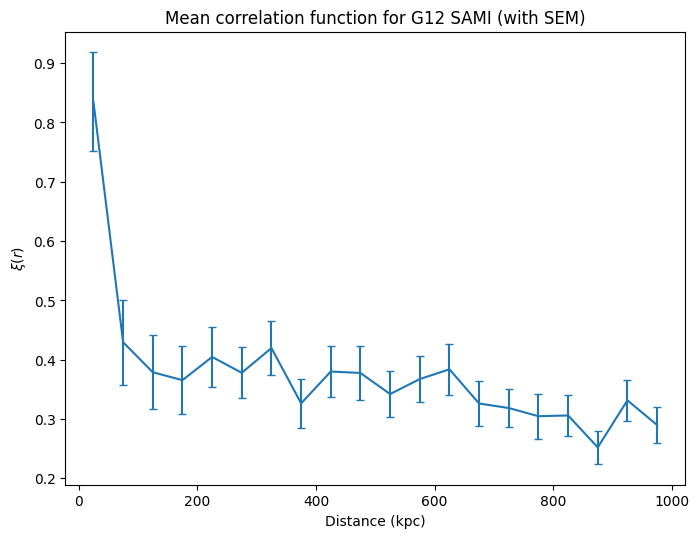

In [43]:
#redshiftsall = ['0.1','0.125','0.15','0.175','0.2','0.225','0.25','0.275','0.3']
redshifts = ['0.125']

plt.figure(figsize=(8,6),dpi=100)    
for i in redshifts:

    reals = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_reals_zlt{}.fits'.format(i))
    print("read in complete (z < {})".format(i))
    
    # plot mean xi with errors

    points = np.array(reals['xi50'])
    meanratios = np.nanmean(points,axis=0)
    print("z < {}".format(i),meanratios)
    counts = []

    for j in range(20):
        counts.append(np.count_nonzero(~np.isnan(points[:,j])))
    #print(i,"Non-nan counts for each bin:",counts)
    
    plt.errorbar(radii,meanratios,yerr=np.nanstd(points,axis=0)/np.sqrt(counts),capsize=3)
    
plt.xlabel('Distance (kpc)')
plt.ylabel(r'$\xi(r)$')
plt.title(r"Mean correlation function for G12 SAMI (with SEM)".format(i))
filename = "/suphys/fscu5535/HSC_work/figures/G12meancorrfuncs0.125.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)   

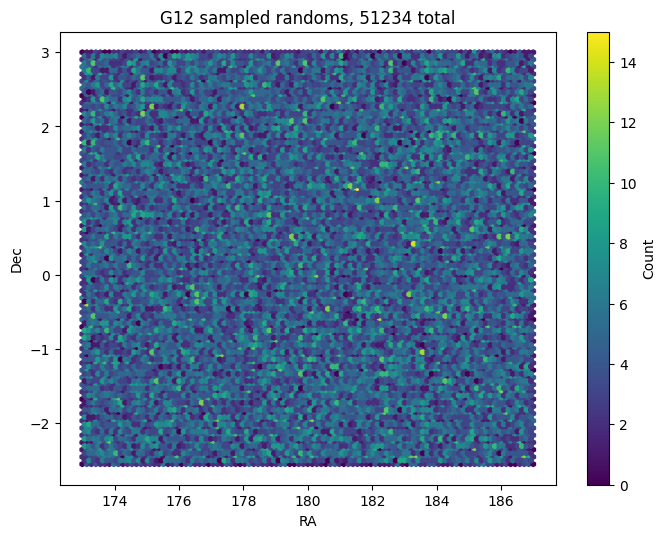

In [44]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(HSC_G12_rands[indices]['ra'],HSC_G12_rands[indices]['dec'])
plt.title("G12 sampled randoms, {} total".format(len(indices)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G12sampledrandoms0.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)


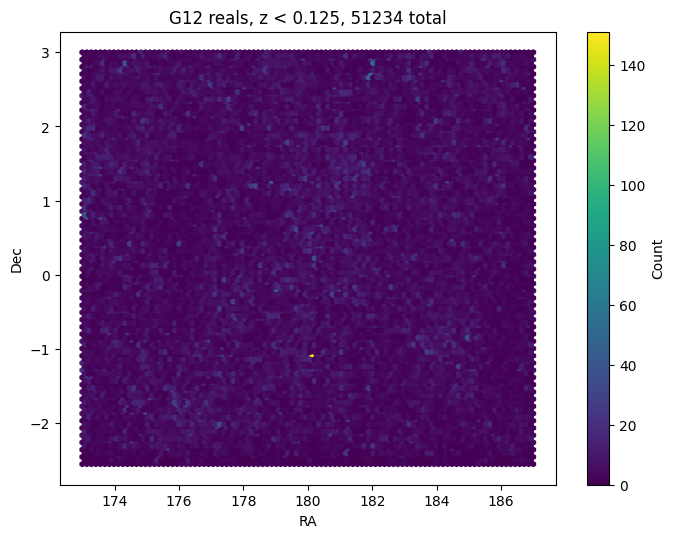

In [33]:
goodra = []
gooddec = []

for i in range(len(HSC_G12_gals)):
    if HSC_G12_gals['photoz_median'][i] <= 0.125:
        goodra.append(HSC_G12_gals['ra'][i])
        gooddec.append(HSC_G12_gals['dec'][i])
        

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(goodra,gooddec)
plt.title("G12 reals, z < 0.125, {} total".format(len(goodra)))
plt.xlabel("RA")
plt.ylabel("Dec")
cb=plt.colorbar()
cb.set_label('Count')
filename = "/suphys/fscu5535/HSC_work/figures/G12realsdist.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)  

In [45]:
print("real dec min:",np.min(gooddec))
print("real dec max:",np.max(gooddec))

print("real ra min:",np.min(goodra))
print("real ra max:",np.max(goodra))


print("RAND (sampled) dec min:",np.min(HSC_G12_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G12_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G12_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G12_rands[indices]['ra']))

print("RAND (all) dec min:",np.min(HSC_G12_rands['dec']))
print("RAND (all) dec max:",np.max(HSC_G12_rands['dec']))
print("RAND (all) ra min:",np.min(HSC_G12_rands['ra']))
print("RAND (all) ra max:",np.max(HSC_G12_rands['ra']))

real dec min: -2.557516155697033
real dec max: 2.9999571762030337
real ra min: 173.0004530158331
real ra max: 186.99980318384888
RAND (sampled) dec min: -2.557497611896867
RAND (sampled) dec max: 2.999880773329661
RAND (sampled) ra min: 173.00038342275144
RAND (sampled) ra max: 186.99935040721604
RAND (all) dec min: -2.5575160702660122
RAND (all) dec max: 2.9999999683338205
RAND (all) ra min: 173.00000018151783
RAND (all) ra max: 186.99999985337752


In [37]:
# fix new data
HSC_G12_rands['ra_rad'] = HSC_G12_rands['ra']*(np.pi/180)
HSC_G12_rands['dec_rad'] = HSC_G12_rands['dec']*(np.pi/180)

HSC_G12_rands.write('/suphys/fscu5535/HSC_work/mod_data/g12randisprimcorrect.fits',overwrite=True)

In [46]:
reals.info()

<Table length=732>
    name     dtype   shape    n_bad  
----------- ------- -------- --------
      CATID   int64                 0
RE_CIRC_KPC float64                30
  OBJECT_ID float64 (60000,) 43158446
   DISTANCE float64 (60000,) 43158446
     HSC_RA float64 (60000,) 43158446
    HSC_DEC float64 (60000,) 43158446
 HSC_PHOTOZ float64 (60000,) 43158446
       xi50 float64    (20,)      767


In [52]:
chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_{}_20Mpc.fits'.format(redshifts[k]),overwrite=True)

In [53]:
print(redshifts[k])

0.125


In [60]:
chunk.remove_columns(['RAND_HSC_RA','RAND_HSC_DEC','RAND_OBJECT_ID'])
chunk.write('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_{}_20Mpc_25xrand.fits'.format(redshifts[k]),overwrite=True)


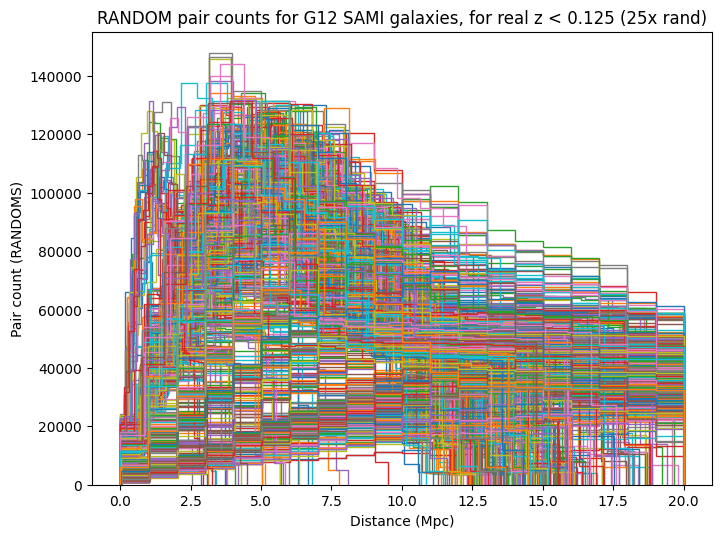

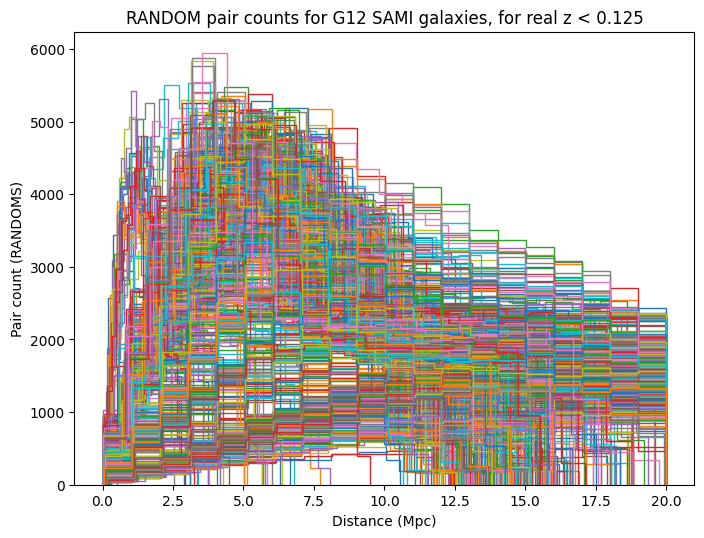

In [62]:
rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_0.125_20Mpc.fits')

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(chunk)):
    plt.hist(chunk['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G12 SAMI galaxies, for real z < 0.125 (25x rand)".format(i))

filename = "/suphys/fscu5535/HSC_work/figures/G12rands20Mpc25x.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
for j in range(len(rands)):
    plt.hist(rands['RAND_DISTANCE'][j],bins=20,histtype='step',fill=False)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Pair count (RANDOMS)")
plt.title("RANDOM pair counts for G12 SAMI galaxies, for real z < 0.125")

filename = "/suphys/fscu5535/HSC_work/figures/G12rands20Mpc.125.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [3]:
print("RAND (sampled) dec min:",np.min(HSC_G12_rands[indices]['dec']))
print("RAND (sampled) dec max:",np.max(HSC_G12_rands[indices]['dec']))
print("RAND (sampled) ra min:",np.min(HSC_G12_rands[indices]['ra']))
print("RAND (sampled) ra max:",np.max(HSC_G12_rands[indices]['ra']))

RAND (sampled) dec min: -2.557513826231208
RAND (sampled) dec max: 2.9999833801786995
RAND (sampled) ra min: 173.00000018151783
RAND (sampled) ra max: 186.99993147446327


shuffle complete 1252100 randoms selected!


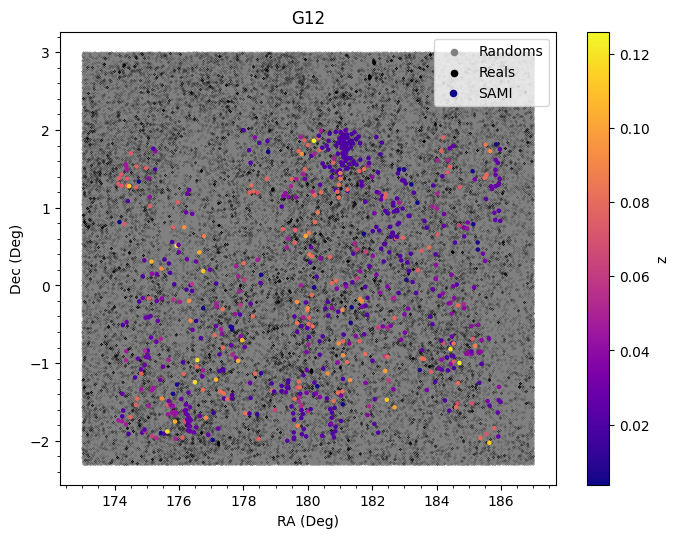

In [2]:
# now repeat for various z 
redshifts = [0.125]
HSC_count = 50084

# these were obtained from the reals calculation

for k in range(len(redshifts)):
    
    random_sample_size = HSC_count*25
    indices = np.random.randint(len(HSC_G12_rands), size = random_sample_size)
    print("shuffle complete", len(indices), "randoms selected!")
    
    plt.figure(figsize=(8,6),dpi=100)
    plt.scatter(HSC_G12_rands[indices]['ra'],HSC_G12_rands[indices]['dec'],s=0.01,c='grey',label="Randoms")
    plt.scatter(HSC_G12_gals['ra'],HSC_G12_gals['dec'],s=0.01,c='black',label="Reals")
    plt.scatter(SAMI_G12_gals['RA'],SAMI_G12_gals['DEC'],s=5,c=SAMI_G12_gals['Z_SPEC'],label="SAMI",cmap='plasma')
    cb = plt.colorbar()
    cb.set_label('z')
    plt.xlabel("RA (Deg)")
    plt.ylabel("Dec (Deg)")
    plt.minorticks_on()
    plt.title("G12")
    legend = plt.legend(loc="upper right",markerscale=1.0)
    for legobj in legend.legendHandles:
        legobj.set_sizes([20])
        
    filename = "/suphys/fscu5535/HSC_work/figures/G12realrandsamifixed.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 